In [5]:
%load_ext autoreload

%autoreload 2
import numpy as np
import corner, sys
import getdist
from getdist import plots, MCSamples
%matplotlib inline
import matplotlib.pyplot as plt
sys.path.append('../../modules/')
import _analysis_list as analysis_list
import numpy as np
#plt.switch_backend("Qt5Agg")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
analysis_list.analysis.keys()

dict_keys(['c_M', 'hmf', 'photoz', 'GammaLambda'])

In [7]:
names = ['1', '2', '3', '4', '5', '6']
labels = [r'\ln \lambda_0', r'\mu_z', r'\mu_m', r'\sigma_{\ln \lambda, 0}', r'\sigma_z', r'\sigma_m']
settings={'mult_bias_correction_order':0,'smooth_scale_2D':4, 'smooth_scale_1D':4, 'boundary_correction_order':0}

In [8]:
path = '/pbs/throng/lsst/users/cpayerne/CLCosmo_Sim/richness_mass_from_DC2/chains_article/'
analysis_to_plot = [analysis_list.analysis['c_M'][0]]

In [9]:
analysis_to_plot = analysis_to_plot + [analysis_list.analysis['GammaLambda'][0]]

In [10]:
len(analysis_to_plot)

2

In [11]:
fit = []
for i in range(len(analysis_to_plot)):
    t = np.load(path+analysis_to_plot[i]['name']+'.pkl', allow_pickle = True)
    M = MCSamples(samples=t['flat_chains'][19000:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label=analysis_to_plot[i]['name'])
    fit.append(M)

FileNotFoundError: [Errno 2] No such file or directory: '/pbs/throng/lsst/users/cpayerne/CLCosmo_Sim/richness_mass_from_DC2/chains_article/MCMC_fit_m-r_WL_1-halo=nfw+c-M=Duffy08_photoz=Truez_hmf=Despali16.pkl'

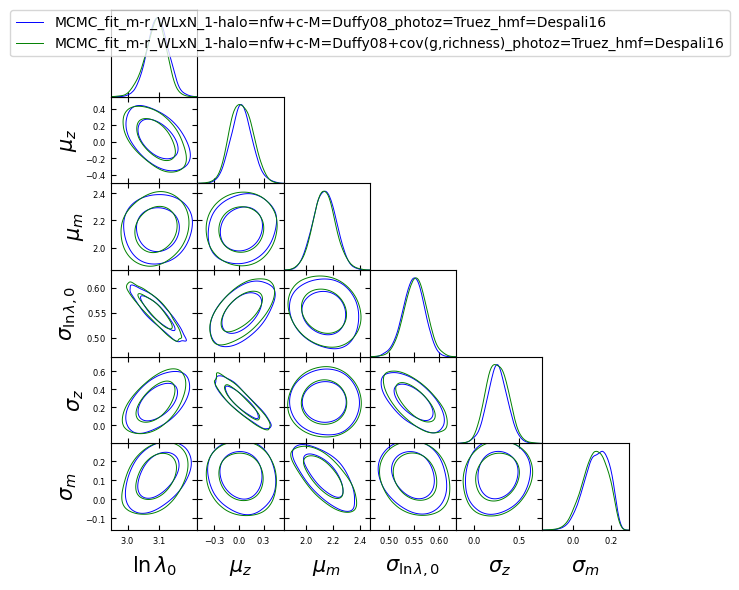

In [65]:
g = plots.get_subplot_plotter(subplot_size=1.)
g.settings.lab_fontsize = 20
g.settings.legend_fontsize = 15
g.triangle_plot(
 fit, 
    #[WL, N, WLN], 
       
                filled=[False, False, True, True, True], 
                contour_colors = ['b', 'g', 'r', 'b', 'g', 'k' ], 
                contour_ls=['-','-','-', '-', '-'],
                #contour_ls=['-','-','-', '--', '--', '--', '-'],
                contour_lws=[.7,.7,1,.5,.5],
                #contour_lws=None
                legend_fontsize = 10,
                fine_bins = 1,  marker_args = {'linewidth':10}, 
           #    markers={str(i+1):np.mean(fiducial[:,i], axis=0) for i in range(6)},

               )

plt.savefig('mcmc_scaling_relation.png', dpi = 300)